In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
## Import all Datasets

customer_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv")

Geo_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv")

order_item_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv")

order_payment_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv")

order_review_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")

order_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv")

product_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv")

seller_data = pd.read_csv(r"C:\Users\Sonu Mandal\OneDrive\Desktop\python ecom case study\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv")

In [3]:
customer_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


# 1. Perform Detailed exploratory analysis

In [4]:
Total_revenue = round(order_payment_data['payment_value'].sum())
Total_Quantity = product_data['product_photos_qty'].sum()
Total_Product = product_data['product_id'].nunique()
Total_category = product_data['product_category_name'].nunique()
Total_sellers=seller_data['seller_id'].count()
Total_location = Geo_data['geolocation_city'].nunique()
Total_payment_method = order_payment_data['payment_type'].nunique()
Total_customers = customer_data['customer_unique_id'].count()
print('Total_revenue:-',Total_revenue)
print()
print('Total_Quantity:-',Total_Quantity)
print()
print('Total_Product:-',Total_Product)
print()
print('Total_category:-',Total_category)
print()
print('Total_sellers:-',Total_sellers)
print()
print('Total_location:-',Total_location)
print()
print('Total_payment_method:-',Total_payment_method)
print()
print('Total_customers:-',Total_customers)

Total_revenue:- 16008872

Total_Quantity:- 70794.0

Total_Product:- 32951

Total_category:- 71

Total_sellers:- 3095

Total_location:- 3809

Total_payment_method:- 5

Total_customers:- 99441


In [5]:
import datetime

from datetime import datetime

In [6]:
## Convert date to datetime

order_data['order_purchase_timestamp'] = pd.to_datetime(order_data['order_purchase_timestamp'])

## Assign a month column
order_data['Month'] = order_data['order_purchase_timestamp'].dt.month

Text(0.5, 1.0, 'Month Wise Customer Count Trend')

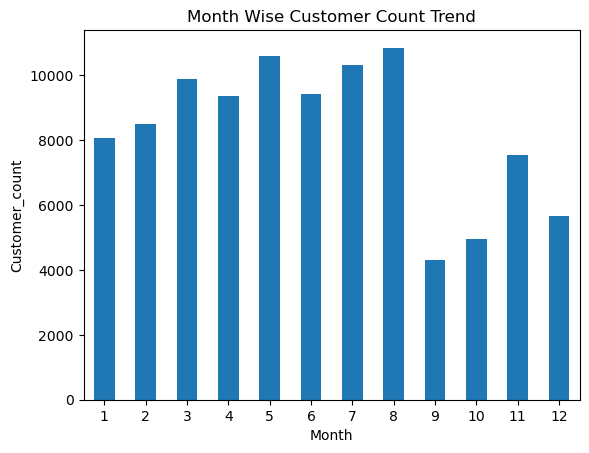

In [7]:
## Visualize the customer count trend
order_data.groupby('Month')['customer_id'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Customer_count')
plt.title('Month Wise Customer Count Trend')

Text(0.5, 1.0, 'Month Wise Customer retention Trend')

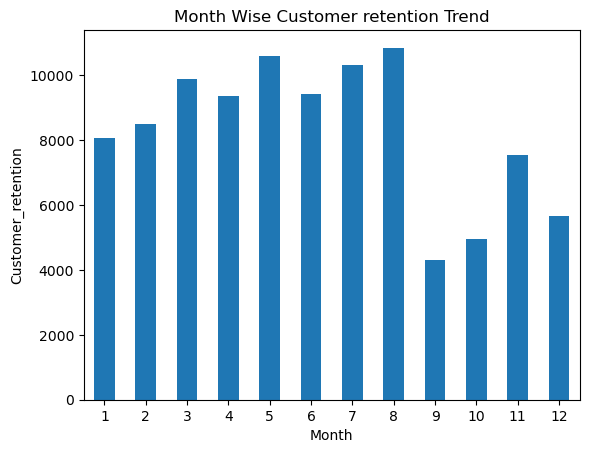

In [8]:
## Visualize the customer count trend
order_data.groupby('Month')['customer_id'].count().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Customer_retention')
plt.title('Month Wise Customer retention Trend') ## I am not sure because not any duplicate customer present in the data so how retention??

In [9]:
rev_data=pd.merge(order_data,order_payment_data,on='order_id',how='inner') # merge sales and revenue data

In [10]:
cutoff_date = pd.to_datetime('2018-7-17') ## choose a cutoff to identify the new customers

In [11]:
rev_data['customer_type'] = 'existing' ## assign the new column customer type

In [12]:
rev_data.loc[rev_data['order_purchase_timestamp'] >= cutoff_date,'customer_type']= 'New'

In [13]:
existing_data = rev_data[rev_data['customer_type'] == 'existing']
new_data = rev_data[rev_data['customer_type'] == 'New'] ## divide the data into existing and new

In [14]:
kk = existing_data.groupby('Month')['payment_value'].sum().reset_index()
ko = new_data.groupby('Month')['payment_value'].sum().reset_index()

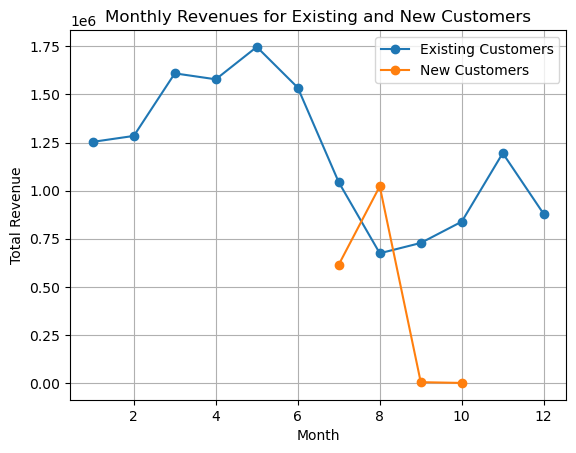

In [15]:
## Plot the graph
plt.plot(kk['Month'],kk['payment_value'],marker='o',label='Existing Customers')
plt.plot(ko['Month'],ko['payment_value'],marker='o',label='New Customers')

plt.title('Monthly Revenues for Existing and New Customers')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)

plt.show()

In [16]:
## define a function to divide the month into season

def categorise_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        'Winter'

In [17]:
rev_data['Season'] = rev_data['Month'].apply(categorise_season)  ## apply the function and assign a column season

In [18]:
# calculate the sale season wise

season_wise_sale=rev_data.groupby('Season')['payment_value'].sum().reset_index()

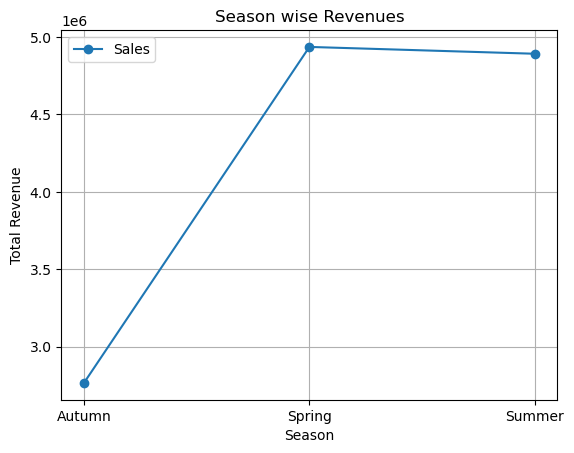

In [19]:
plt.plot(season_wise_sale['Season'], season_wise_sale['payment_value'],marker = 'o',label='Sales')

plt.title('Season wise Revenues' )
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
## Month wise sales

month_data=rev_data.groupby('Month')['payment_value'].sum().reset_index()

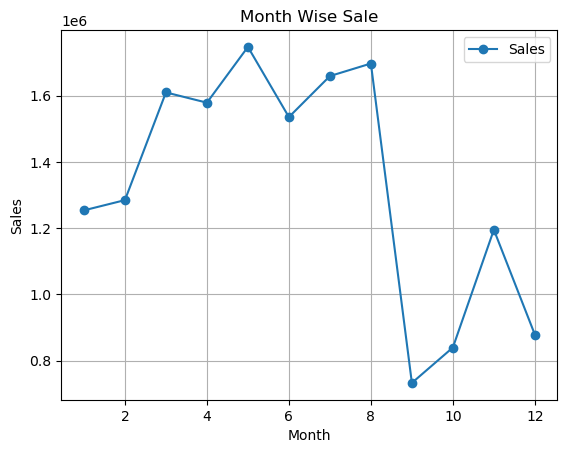

In [21]:
plt.plot(month_data['Month'],month_data['payment_value'],marker='o',label='Sales')

plt.title('Month Wise Sale')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()

plt.show()

In [22]:
rev_data['Week']=rev_data['order_purchase_timestamp'].dt.week ## Assign a week column

C:\Users\Sonu Mandal\AppData\Local\Temp\ipykernel_13504\435684739.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rev_data['Week']=rev_data['order_purchase_timestamp'].dt.week ## Assign a week column


In [23]:
## Week wise sale

week_wise = rev_data.groupby('Week')['payment_value'].sum().reset_index()

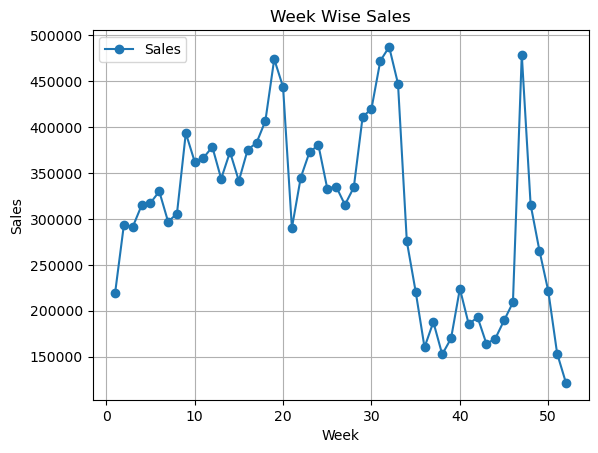

In [24]:
## plot a graph

plt.plot(week_wise['Week'],week_wise['payment_value'],marker='o',label='Sales')

plt.title('Week Wise Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

plt.show()

In [25]:
## Day Wise Sales 

date_wise_sale = rev_data.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

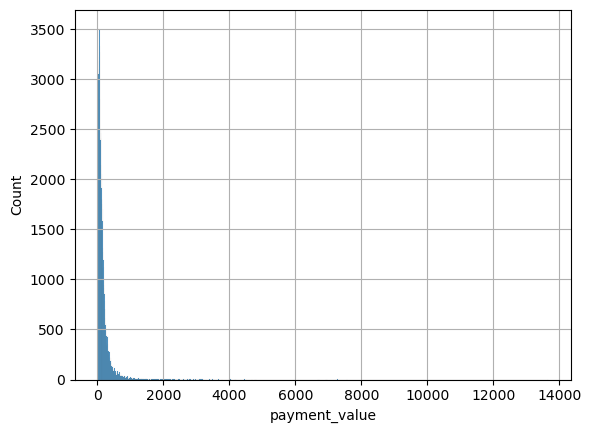

In [26]:
## Plot the graph

sns.histplot(date_wise_sale['payment_value'])
plt.grid(True)

In [27]:
pat=rev_data.groupby('payment_type')['payment_value'].sum().reset_index()

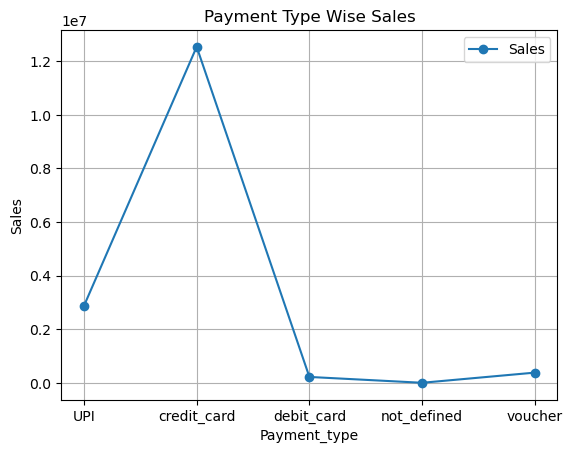

In [28]:
plt.plot(pat['payment_type'],pat['payment_value'],marker='o',label='Sales')

plt.title('Payment Type Wise Sales')
plt.xlabel('Payment_type')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

plt.show()

In [29]:
rev_data['Time']=rev_data['order_purchase_timestamp'].dt.time ## Assign a time column

rev_data['Time']=rev_data['Time'].apply(lambda x:x.hour)  ## convert into hour

In [30]:
## Time wise sale

hour_wise_sale = rev_data.groupby('Time')['payment_value'].sum().reset_index()

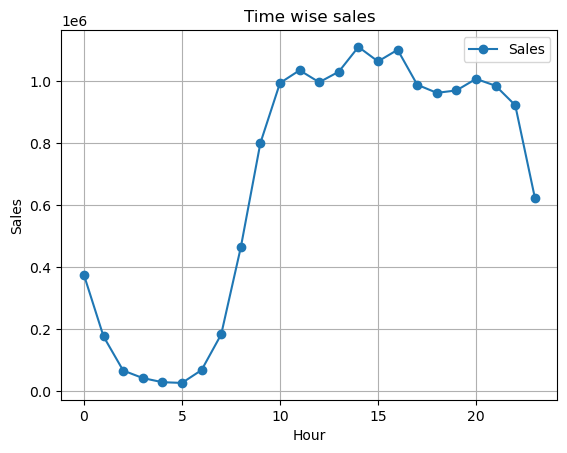

In [31]:
plt.plot(hour_wise_sale['Time'],hour_wise_sale['payment_value'],marker='o',label='Sales')

plt.title('Time wise sales')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()

plt.show()


In [32]:
ord_prod=pd.merge(product_data,order_item_data,on='product_id',how='inner') ## Merge Order data and product data

In [33]:
rev_ord_prod = pd.merge(rev_data,ord_prod,on = 'order_id',how='inner') ## merge sales,order,order item,product data

In [34]:
popularity_item = rev_ord_prod.groupby(['Month','seller_id','product_category_name',
                      'product_name_lenght'])['product_name_lenght'].count().reset_index(name='Popularity')

In [35]:
popularity_item.iloc[popularity_item.groupby(['Month','seller_id','product_category_name',
                      'product_name_lenght'])['Popularity'].idxmax()]  ## popular product by month,sales,category

,Month,seller_id,product_category_name,product_name_lenght,Popularity
0,1,001cca7ae9ae17fb1caed9dfb1094831,Garden_Tools,33.0,3
1,1,001cca7ae9ae17fb1caed9dfb1094831,Garden_Tools,36.0,4
2,1,001cca7ae9ae17fb1caed9dfb1094831,Garden_Tools,39.0,1
3,1,002100f778ceb8431b7a1020ff7ab48f,Furniture_Decor,54.0,1
4,1,002100f778ceb8431b7a1020ff7ab48f,Furniture_Decor,58.0,1
...,...,...,...,...,...
48106,12,ffeee66ac5d5a62fe688b9d26f83f534,Home_Appliances,54.0,2
48107,12,ffeee66ac5d5a62fe688b9d26f83f534,Home_Appliances,59.0,2
48108,12,fffd5413c0700ac820c7069d66d98c89,Furniture_Decor,52.0,1
48109,12,fffd5413c0700ac820c7069d66d98c89,Housewares,37.0,2


In [36]:
rev_ord_cust_prod = pd.merge(rev_ord_prod,customer_data,on='customer_id',how='inner') ## merge customer data

In [37]:
popu=rev_ord_cust_prod.groupby(['Month','customer_state',
                                'product_category_name'])['product_category_name'].count().reset_index(name='pop')

In [38]:
popu.iloc[popu.groupby(['Month','customer_state','product_category_name'])['pop'].idxmax()] # popular category by state, month

,Month,customer_state,product_category_name,pop
0,1,Andhra Pradesh,Agro_Industry_And_Commerce,11
1,1,Andhra Pradesh,Air_Conditioning,25
2,1,Andhra Pradesh,Art,15
3,1,Andhra Pradesh,Audio,19
4,1,Andhra Pradesh,Auto,165
...,...,...,...,...
7056,12,West Bengal,Housewares,2
7057,12,West Bengal,Industry_Commerce_And_Business,1
7058,12,West Bengal,Luggage_Accessories,1
7059,12,West Bengal,Musical_Instruments,2


In [39]:
print('Top 10 most expensive product:-')
rev_ord_cust_prod[['product_name_lenght','price']].sort_values(by='price',ascending=False).nlargest(10,columns='price')

Top 10 most expensive product:-


,product_name_lenght,price
26156,31.0,6735.00
33546,50.0,6729.00
4109,28.0,6499.00
63037,41.0,4799.00
47729,59.0,4690.00
47745,55.0,4590.00
13714,59.0,4399.87
22961,59.0,4099.99
3161,51.0,4059.00
67383,53.0,3999.90


# Performing Customers/sellers Segmentation

In [40]:
rev_quantiles = rev_ord_cust_prod['payment_value'].quantile([0,0.25,0.5,0.75,1])

In [41]:
## make a function for segment assignment

def assign_segment(revenue):
    if revenue<=rev_quantiles[0.25]:
        return 'low'
    elif revenue<=rev_quantiles[0.5]:
        return 'medium_low'
    elif revenue<=rev_quantiles[0.75]:
        return 'medium_high'
    else:
        return 'high'

In [42]:
rev_ord_cust_prod['Segment']=rev_ord_cust_prod['payment_value'].apply(assign_segment) ## assigned a segment column

In [43]:
rev_ord_cust_prod.groupby('Segment')['payment_value'].sum().reset_index() ## Segment wise revenue

,Segment,payment_value
0,high,12493369.30
1,low,1141058.86
2,medium_high,4235852.68
3,medium_low,2437853.87


In [44]:
rev_ord_cust_prod['seller_segment'] = rev_ord_cust_prod['payment_value'].apply(assign_segment) ## seller segment

In [45]:
rev_ord_cust_prod.groupby('seller_segment')['payment_value'].sum().reset_index(name='revenue') ## Seller segment wise revenue

,seller_segment,revenue
0,high,12493369.30
1,low,1141058.86
2,medium_high,4235852.68
3,medium_low,2437853.87


In [46]:
dr=rev_ord_cust_prod.groupby(['customer_id','product_name_lenght'])['product_name_lenght'].count().reset_index(name='prod_cnt')

In [47]:
dr[dr['prod_cnt']>1]

,customer_id,product_name_lenght,prod_cnt
12,00066ccbe787a588c52bd5ff404590e3,57.0,4
15,000bf8121c3412d3057d32371c5d3395,63.0,2
16,000e943451fc2788ca6ac98a682f2f49,54.0,4
22,001051abfcfdbed9f87b4266213a5df1,53.0,3
67,002f90a6eb386bc43bc9ba200db31a89,55.0,2
...,...,...,...
100194,fff168ca1f8a1d2e8e2108b231a68a8c,48.0,2
100201,fff3a5c6d542d52b05f7e4518adf996e,57.0,3
100213,fff93c1da78dafaaa304ff032abc6205,58.0,2
100217,fffecc9f79fd8c764f843e9951b11341,48.0,3


# Payment Behaviour


Text(0, 0.5, 'Sale')

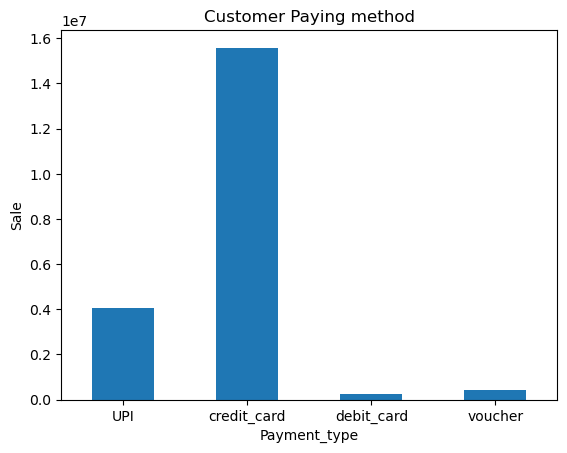

In [48]:
rev_ord_cust_prod.groupby('payment_type')['payment_value'].sum().plot(kind='bar') # grouping the data by payment method
plt.xticks(rotation=360)
plt.title('Customer Paying method')
plt.xlabel('Payment_type')
plt.ylabel('Sale')

In [49]:
## Ans. Credit card method is most used by customers

# Customer satisfaction towards category & product

In [50]:
rev_ord_cust_prod_ren=pd.merge(rev_ord_cust_prod,order_review_data,on='order_id',how='inner') ## merge customer review table

In [51]:
rev_scr=rev_ord_cust_prod_ren.groupby('product_category_name')['review_score'].sum().reset_index() ## category wise review score

In [52]:
## top 10 maximum rated category

rev_scr.nlargest(10,columns='review_score')

,product_category_name,review_score
7,Bed_Bath_Table,46366
43,Health_Beauty,41315
65,Sports_Leisure,36856
39,Furniture_Decor,34407
15,Computers_Accessories,32002
49,Housewares,29854
70,Watches_Gifts,24856
68,Telephony,18612
42,Garden_Tools,18412
5,Auto,17770


In [53]:
## top 10 minimum rated category

rev_scr.sort_values(by='review_score',ascending=True)[:10]

,product_category_name,review_score
61,Security_And_Services,5
29,Fashion_Childrens_Clothes,36
52,La_Cuisine,63
11,Cds_Dvds_Musicals,65
3,Arts_And_Craftmanship,99
46,Home_Comfort_2,105
23,Diapers_And_Hygiene,127
32,Fashion_Sport,132
35,Flowers,139
41,Furniture_Mattress_And_Upholstery,156


In [54]:
rev_ord_cust_prod_ren.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118315 non-null  object        
 1   customer_id                    118315 non-null  object        
 2   order_status                   118315 non-null  object        
 3   order_purchase_timestamp       118315 non-null  datetime64[ns]
 4   order_approved_at              118300 non-null  object        
 5   order_delivered_carrier_date   117061 non-null  object        
 6   order_delivered_customer_date  115727 non-null  object        
 7   order_estimated_delivery_date  118315 non-null  object        
 8   Month                          118315 non-null  int64         
 9   payment_sequential             118315 non-null  int64         
 10  payment_type                   118315 non-null  object        
 11  

In [55]:
pr_scr=rev_ord_cust_prod_ren.groupby('product_name_lenght')['review_score'].sum().reset_index() ## product wise score

In [56]:
## top 10 product with maximum rating

pr_scr.nlargest(10,'review_score')

,product_name_lenght,review_score
54,59.0,34962
55,60.0,32641
51,56.0,27646
53,58.0,26661
52,57.0,25764
50,55.0,23169
49,54.0,21983
48,53.0,17565
47,52.0,17439
44,49.0,14951


In [57]:
## top 10 product with minimum rating 

pr_scr.sort_values(by='review_score',ascending=True)[:10]

,product_name_lenght,review_score
63,69.0,2
65,76.0,5
62,68.0,5
60,66.0,5
2,7.0,6
1,6.0,14
61,67.0,14
3,8.0,17
64,72.0,29
5,10.0,33


In [58]:
avg=rev_ord_cust_prod_ren.groupby(['customer_city','seller_id','product_name_lenght','product_category_name',
                               'Month'])['review_score'].mean().reset_index()

In [59]:
## top 10 avg rating

avg.nlargest(10,'review_score')

,customer_city,seller_id,product_name_lenght,product_category_name,Month,review_score
0,Aadityana,2528513dd95219a6013d4d05176e391a,57.0,Home_Confort,6,5.0
1,Aadityana,3b872fd4747f01cc56206f2934198618,56.0,Bed_Bath_Table,6,5.0
3,Aadityana,4a3ca9315b744ce9f8e9374361493884,51.0,Bed_Bath_Table,3,5.0
5,Aadityana,6ec1a01e866584bb679eb9b098345919,53.0,Health_Beauty,7,5.0
6,Aadityana,7a67c85e85bb2ce8582c35f2203ad736,26.0,Baby,5,5.0
8,Aadityana,8648b1e89e9b349e32d3741b30ec737e,59.0,Construction_Tools_Construction,7,5.0
9,Aadityana,8a432f4e5b471f8da497d7dc517666e2,59.0,Bed_Bath_Table,7,5.0
13,Aadityana,a6fe7de3d16f6149ffe280349a8535a0,52.0,Fashion_Underwear_Beach,5,5.0
16,Aadityana,f7720c4fa8e3aba4546301ab80ea1f1b,54.0,Garden_Tools,7,5.0
19,Aantaliya,080102cd0a76b09e0dcf55fcacc60e05,49.0,Computers_Accessories,12,5.0
